In [13]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import datetime


In [49]:
%run naturalGas_Wrangling.ipynb

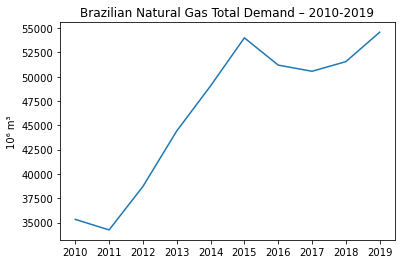

In [50]:
demand_total.plot()
plt.title(demand_total_title)
plt.ylabel(demand_total_unit)
plt.xticks(np.arange(2010,2020,1));

In [51]:
type(demand_total)

pandas.core.series.Series

## ARIMA MODEL

Auto Regressive Integrated Moving Average Model is characterized by 3 terms:

> * `p`: is the order of the AR (Auto Regressive) term
> * `d`: is the number of differencing (Integrated) required to make the time series stationary
> * `q`: is the order of the MA (Moving Average) term


1 - `Why` make the time series `stationary`?

>The `Auto Regressive` term in ARIMA means that the linear regression model uses its own lags as predictors, and in order to do so, the time series need to be stationary.

2 - `How` to make it `stationary`?

>Differentiating it. Sometimes more than one differencing may be needed.

3 - What is the meaning of `order of AR term`?

>It is the number of lags of Y to be used as predictors.

4 - What is the meaning of `order of MA term`?

>It is the number of lagged forecast erros taht should go into the ARIMA Model.

5 - What is `Moving Average`?

>Is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

### Auto Regressive Model

Is where $Y_{t}$ depends only on its own lags.

> $Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p} + \epsilon_{1} $

>* $Y_{t}$: is the $lag_{1}$ of the series.
>* $\beta_{1}$: is the coefficient of $lag_{1}$ that the model estimates
>* $\alpha$: is the intercept term, also estimated by the model.

### Moving Average Model

Is where $Y_{t}$ depends only on the lagged forecast errors.

> $Y_{t} = \alpha + \epsilon_{t} + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2}$ + ...  $+ \phi_{q} \epsilon_{t-q}$
>* $\epsilon_{t}$: is the errors from $Y_{t}$
>* $\epsilon_{t-1}$: is the errors from $Y_{t-1}$

### ARIMA MODEL EQUATION

Is where the time series was differenced at least one time to make it stationary and you combine the AR term and the MA term. So the equation becomes:

>$Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p}\epsilon_{t}$
$ + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2} + ... + \phi_{q} \epsilon_{t-q}$





In [53]:
# Finding d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(demand_total)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.042111
p-value: 0.737597


In [67]:
demand_total.to_frame()
type(demand_total)

pandas.core.series.Series

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(demand_total.value); axes[0, 0].set_title('Original Series')
plot_acf(demand_total.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(demand_total.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(demand_total.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(demand_total.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(demand_total.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

AttributeError: 'Series' object has no attribute 'value'

In [58]:
demand_total

2010    35324.176812
2011    34241.142880
2012    38715.187190
2013    44421.633965
2014    49058.123000
2015    54000.577479
2016    51196.198989
2017    50560.624178
2018    51550.107133
2019    54575.447061
dtype: float64